# Proejct9 - Twitter US Airline Sentiment

## Context

* Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.


* That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


* Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

## Objective

* To implement the techniques learned as a part of the course.

## Data

**Description**

* A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

**Dataset (Tweets.csv)**

    The dataset has the following columns:

    - tweet_id                                                           
    - airline_sentiment                                               
    - airline_sentiment_confidence                               
    - negativereason                                                   
    - negativereason_confidence                                    
    - airline                                                                    
    - airline_sentiment_gold                                              
    - name     
    - negativereason_gold 
    - retweet_count
    - text
    - tweet_coord
    - tweet_created
    - tweet_location 
    - user_timezone

## Importing the necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import re, string, unicodedata                      # Import Regex, string and unicodedata.
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import contractions                                 # Import contractions library.
import nltk                                         #Natural language processing tool-kit
from bs4 import BeautifulSoup                       # Import BeautifulSoup.

from wordcloud import WordCloud,STOPWORDS           # For Word Cloud
from nltk.corpus import stopwords                   # Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

from nltk.corpus import stopwords, wordnet              # Stopwords, and wordnet corpus
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split, KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score

nltk.download('stopwords')    #download stopwords
nltk.download('punkt')        #downlad punkt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\young\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\young\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading and exploring the dataset

### Read the dataset

In [2]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")

### Overview of the dataset

#### Check the shape of data

In [3]:
data.shape               # print shape of data.

(14640, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

* The dataset has 14640 rows and 15 columns

#### View random rows of the data.

In [5]:
data.sample(n=5, random_state=1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
8515,568198336651649027,positive,1.0000,NaN,NaN,Delta,NaN,GenuineJack,NaN,0,@JetBlue I'll pass along the advice. You guys ...,NaN,2015-02-18 16:00:14 -0800,Massachusetts,Central Time (US & Canada)
3439,568438094652956673,negative,0.7036,Lost Luggage,0.7036,United,NaN,vina_love,NaN,0,@united I sent you a dm with my file reference...,NaN,2015-02-19 07:52:57 -0800,ny,Quito
6439,567858373527470080,positive,1.0000,NaN,NaN,Southwest,NaN,Capt_Smirk,NaN,0,@SouthwestAir Black History Commercial is real...,NaN,2015-02-17 17:29:21 -0800,La Florida,Eastern Time (US & Canada)
5112,569336871853170688,negative,1.0000,Late Flight,1.0000,Southwest,NaN,scoobydoo9749,NaN,0,@SouthwestAir why am I still in Baltimore?! @d...,"[39.1848041, -76.6787131]",2015-02-21 19:24:22 -0800,"Tallahassee, FL",America/Chicago
5645,568839199773732864,positive,0.6832,NaN,NaN,Southwest,NaN,laurafall,NaN,0,@SouthwestAir SEA to DEN. South Sound Volleyba...,NaN,2015-02-20 10:26:48 -0800,NaN,Pacific Time (US & Canada)


* Since column A is a date item, it is changed to a datetime type.

In [6]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'])

#### Check for null values

In [7]:
data.isnull().sum(axis=0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

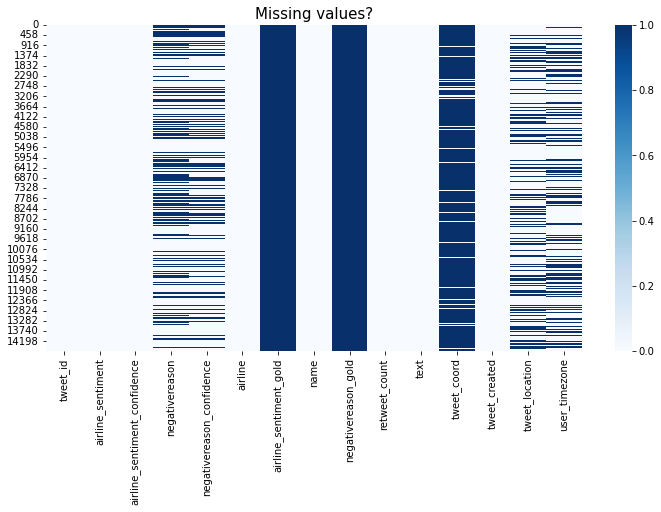

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

* It was observed that many columns contained missing values.
* Most of the values in `airline_sentiment_gold`, `negativereasion_gold` and `tweet_coord` columns are missing.

#### View basic statistical details

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)  
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.00,569218351767382528.00,779111158481836.75,567588278875213824.00,568559178101439488.00,569477857923110912.00,569890473289000960.00,570310600460525568.00
airline_sentiment_confidence,14640.00,0.90,0.16,0.34,0.69,1.00,1.00,1.00
negativereason_confidence,10522.00,0.64,0.33,0.00,0.36,0.67,1.00,1.00
retweet_count,14640.00,0.08,0.75,0.00,0.00,0.00,0.00,44.00


## **Exploratory Data Analysis (EDA)**

### Functions

In [10]:
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """

  show histogram & boxplot at once

  data : dataframe
  feature : column name
  figsize ; figure size (default (12,7))
  kde : whether to show density curve ( default false )
  bins : bin numbers ( default None)

  """

    fs, (ax_box, ax_hist) = plt.subplots(
        nrows=2, sharex=True, figsize=(12, 7), gridspec_kw={"height_ratios": (0.3, 0.7)}
    )
    sns.boxplot(data=data, ax=ax_box, x=feature, showmeans=True, color="violet")
    if bins:
        sns.histplot(data=data, ax=ax_hist, x=feature, bins=bins, kde=kde)
    else:
        sns.histplot(data=data, ax=ax_hist, x=feature, kde=kde)
    ax_hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  ## draw a green dotted line of mean
    ax_hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  ## draw a black straight line of median
    plt.show()

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, rotation=90,x_order=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))
    plt.xticks(rotation=rotation, fontsize=12)
    if x_order == None:
        
        ax = sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            order=data[feature].value_counts().index[:n].sort_values(),
        )
    else:
         ax = sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            order=x_order,
        )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [12]:
# function to visualize 3 categorical variables with count plot


def splitted_countplot(data, predictor, target, hue=None, rotation=0, hue_order=None,order=None):
    target_list = list(
        data[target].dropna().unique()
    )  # extract a list of unique value except NaN in target variables
    target_length = len(target_list)
    nrow_subplot = (target_length // 3) + 1
    fig_height = nrow_subplot * 4
    fig, ax = plt.subplots(nrow_subplot, 3, figsize=(12, fig_height))
    plt.subplots_adjust(hspace=0.6, wspace=0.4)

    # define extra subplot coord and delete it.
    for i in range(nrow_subplot):
        for j in range(3):
            if i * 3 + j + 1 > target_length:
                fig.delaxes(ax[i, j])
    # ------------------------------------------------

    for k, uniq_value in enumerate(target_list):
        row_index = k // 3  # for ax index
        col_index = k % 3  # for ax index
        subdata = data[
            data[target] == uniq_value
        ]  # generate subset of data including only one type of value in target variable
        subfig = sns.countplot(
            data=subdata, x=predictor, hue=hue, hue_order=hue_order,ax=ax[row_index, col_index],order=order
        )
        subfig.set_xticklabels(subfig.get_xticklabels(), rotation=rotation)
        ax[row_index, col_index].set_title(uniq_value)
    plt.show()

### Tweet distributions

#### by airline

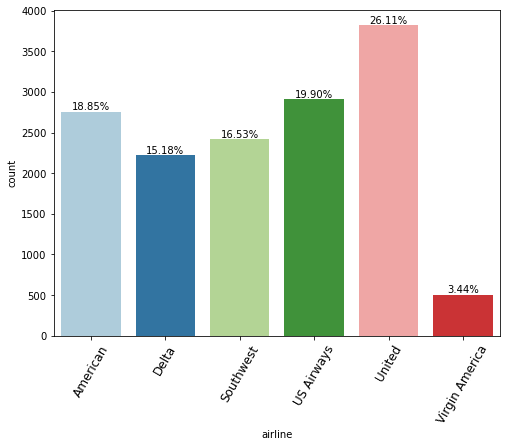

In [13]:
labeled_barplot(data,'airline',perc=True,rotation=60)

* United is the most tweeted at 26.11% and Virgin America is the least tweeted at 3.44%.

#### by airline_sentiment

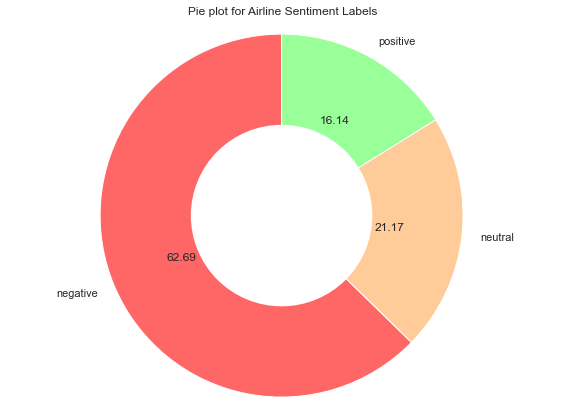

In [14]:
#plot for Social Dielemma Sentiment Labels
#Using matplotlib
colors = ['#ff6666', '#ffcc99', '#99ff99']

sns.set(rc={'figure.figsize':(8,6)})
plot = plt.pie(data['airline_sentiment'].value_counts(), labels=data['airline_sentiment'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pie plot for Airline Sentiment Labels')
plt.axis('equal')
plt.tight_layout()
plt.show()

* Negative tweets about airlines accounted for more than half (62.69%), followed by neutral tweets at 21.17% and positive tweets at 16.14%.
* The dataset is imbalanced.

#### by airline and airline_sentiment

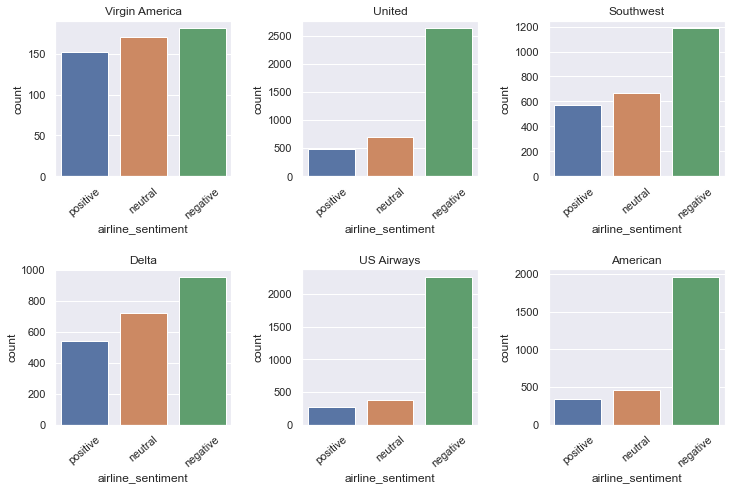

In [15]:
splitted_countplot(data,'airline_sentiment','airline',rotation=40,order=['positive','neutral','negative'])

* As observed earlier, all airlines had the most negative tweets and the fewest positive tweets.
* Virgin America had the highest percentage of positive tweets compared to other airlines, while US Airways had the lowest.

#### by tweet_created

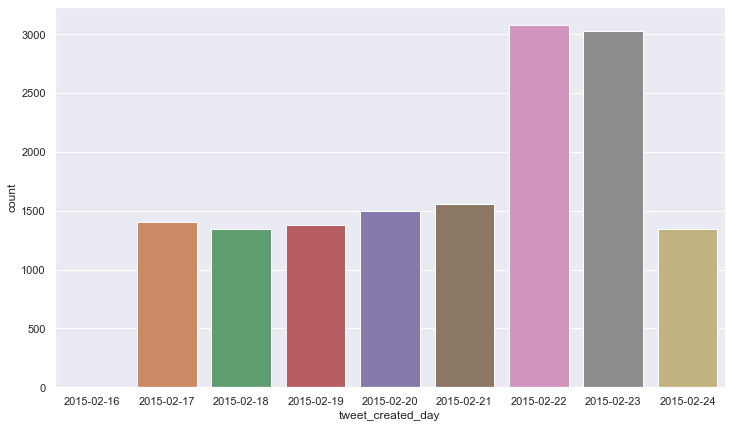

In [16]:
# extract year-month-day from datetime
data['tweet_created_day'] = pd.to_datetime(data['tweet_created']).dt.to_period('D')
plt.figure(figsize=(12,7))
sns.countplot(data=data,x='tweet_created_day',order=sorted(data['tweet_created_day'].unique()))
plt.show()

* On February 16, it seems that the data was not properly collected, and on February 22 and 23, the number of tweets is higher than on other days.

#### by user_timezone

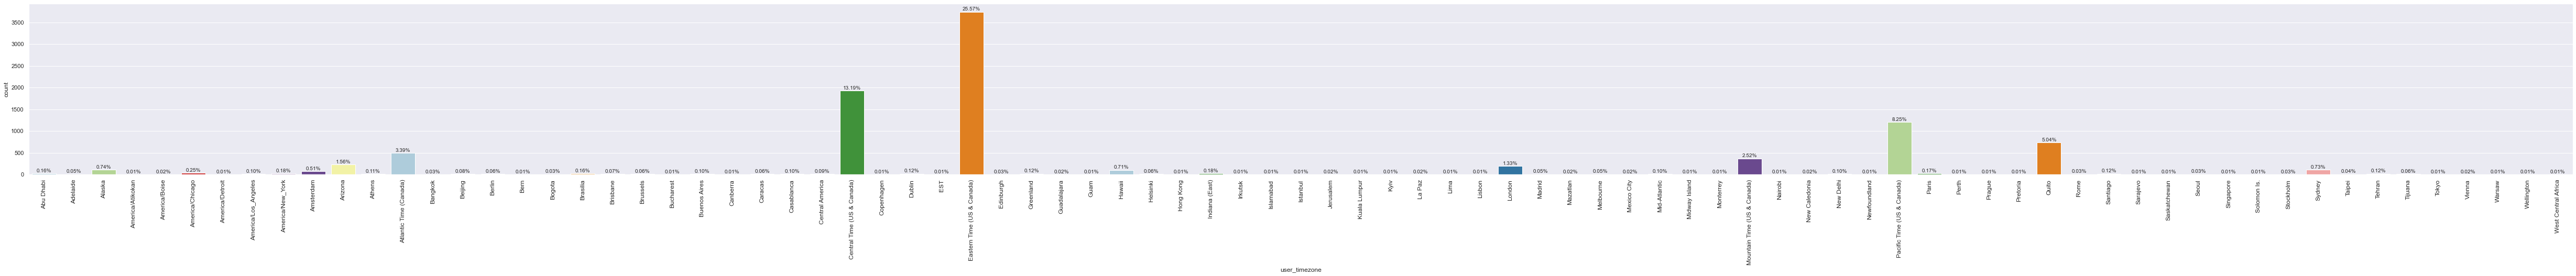

In [17]:
labeled_barplot(data,'user_timezone',perc=True)

In [18]:
d_tz = data['user_timezone'].value_counts().reset_index()  # get the counts of tweets for each user timezone
d_tz.columns = ['user_timezone', 'count']

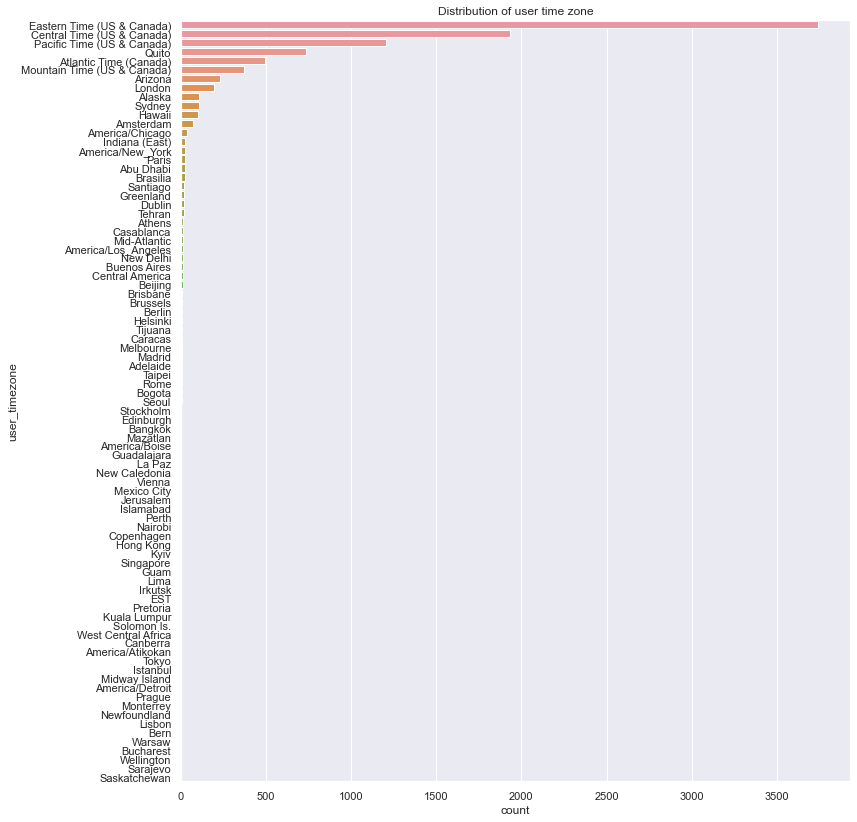

In [19]:
plt.figure(figsize=(12,14))
fig = sns.barplot( 
    x=d_tz["count"], 
    y=d_tz["user_timezone"], 
    orientation='horizontal'
).set_title('Distribution of user time zone')
plt.show()

* The most Tweets were created by users in the Eastern Time (25.57%), followed by users in the Central Time (13.19%) and users in the Pacific Time (8.25%).

#### by negativereason

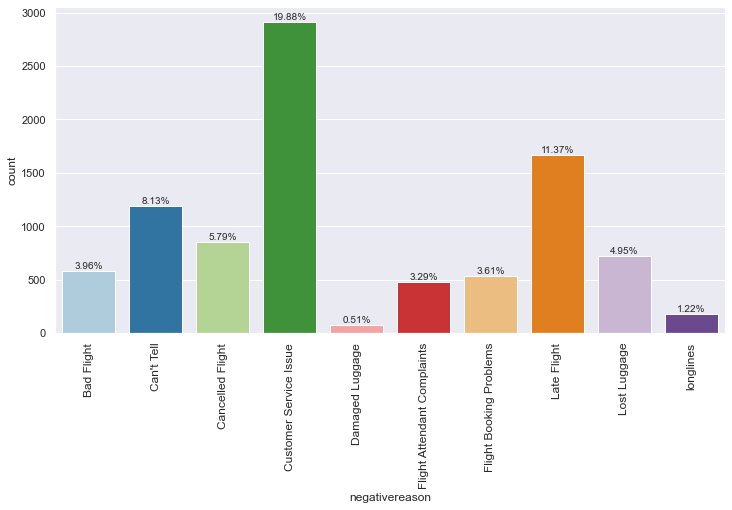

In [20]:
labeled_barplot(data,'negativereason',perc=True)

* Customer service issue was the most common reason for negative tweets at 19.88%, followed by late flight at 11.37%.

### Word Cloud for positive Reviews

In [21]:
#creating word cloud for positive reviews
positive_tweets=data[data['airline_sentiment']=='positive']
positive_words = ' '.join(positive_tweets['text'])
positive_cleaned_word = " ".join([word for word in positive_words.split()])
positive_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(positive_cleaned_word)

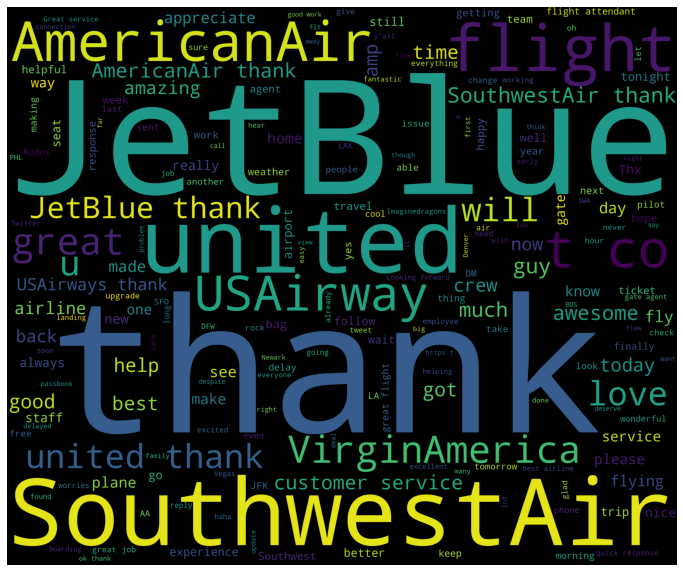

In [22]:
plt.figure(1,figsize=(12, 12))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

* **thank, flight, will, great, love, customer service** were some of the important recurring words observed in the positive reviews.

### Word Cloud for negative Reviews

In [23]:
#creating word cloud for positive reviews
negative_tweets=data[data['airline_sentiment']=='negative']
negative_words = ' '.join(negative_tweets['text'])
negative_cleaned_word = " ".join([word for word in negative_words.split()])
negative_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(negative_cleaned_word)

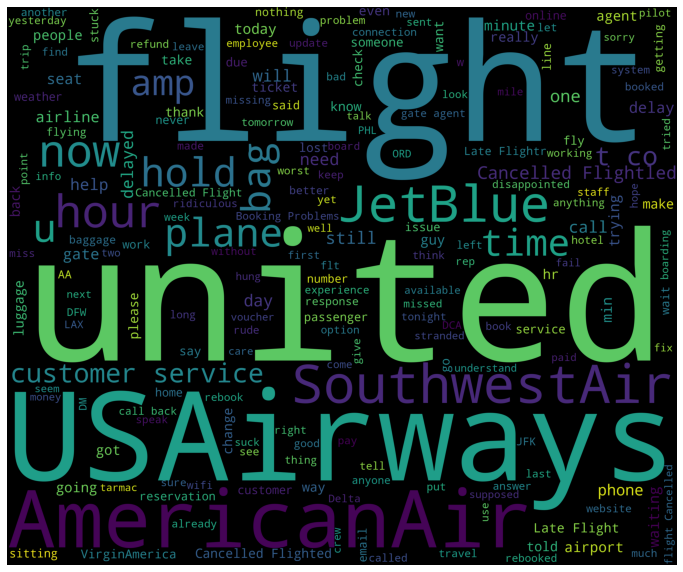

In [24]:
plt.figure(1,figsize=(12, 12))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

* **flight, plane, hour, hold, bag, time, customer service, Cancelled Flightled** were some of the important recurring words observed in the negative reviews.

## **Data Pre-processing**

- Remove html tags.
- Replace contractions in string.
- Remove numbers.
- Remove the URL's.
- Remove the mentions in the tweets('@').
- Tokenization.
- Remove the non-ASCII characters
- Lower case.
- Remove the punctuations.
- Remove Stopwords.
- Remove the hashtags.
- Lemmatized data.

### Functions

In [25]:
# For Text
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

# remove the url's present in the text
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    text = remove_url(text)
    text = remove_mention(text)
    return text

In [26]:
# For Token

stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def remove_hash(words):
   """Remove hashtags from list of tokenized words"""
   new_words = []
   for word in words:
     new_word = re.sub(r'#\w+','',word)
     if new_word != '':
       new_words.append(new_word)
   return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = remove_hash(words)
    words = lemmatize_list(words)
    return ' '.join(words)

### Dropping of unnecessary columns

In [27]:
data = data[['text','airline_sentiment']]

In [28]:
data.shape

(14640, 2)

* Now, the dataset has 14640 rows and 2columns

In [29]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [30]:
data.tail() # Check last 5 rows of data

,text,airline_sentiment
14635,@AmericanAir thank you we got on a different flight to Chicago.,positive
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,negative
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,neutral
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",negative
14639,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,neutral


### Text cleaning

In [31]:
data['text'] = data['text'].apply(lambda x: clean_text(x))
data.head()

,text,airline_sentiment
0,What said.,neutral
1,plus you have added commercials to the experience... tacky.,positive
2,I did not today... Must mean I need to take another trip!,neutral
3,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,and it is a really big bad thing about it,negative


In [32]:
data.tail()

,text,airline_sentiment
14635,thank you we got on a different flight to Chicago.,positive
14636,leaving over minutes Late Flight. No warnings or communication until we were minutes Late Flight. That is called shitty customer svc,negative
14637,Please bring American Airlines to #BlackBerry,neutral
14638,"you have my money, you change my flight, and do not answer your phones! Any other suggestions so I can make my commitment??",negative
14639,we have people so we need know how many seats are on the next flight. Plz put us on standby for people on the next flight?,neutral


### Tokenization

In [33]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data.head()

,text,airline_sentiment
0,"[What, said, .]",neutral
1,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[and, it, is, a, really, big, bad, thing, about, it]",negative


### Token normalization

In [34]:
data['text'] = data['text'].apply(lambda x: normalize(x))
data.head()

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative


In [35]:
data.tail()

,text,airline_sentiment
14635,thank get different flight chicago,positive
14636,leave minutes late flight warn communication minutes late flight call shitty customer svc,negative
14637,please bring american airlines blackberry,neutral
14638,money change flight answer phone suggestions make commitment,negative
14639,people need know many seat next flight plz put us standby people next flight,neutral


## Sentiment Analysis

### Building the model based on CountVectorizer and Random Forest

#### Vectorization

In [36]:
count_vec = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = count_vec.fit_transform(data['text'])
data_features = data_features.toarray()                        # Convert the data features to array.

In [37]:
data_features.shape

(14640, 1000)

In [38]:
X = data_features
y = data["airline_sentiment"].replace({"negative": 0, "neutral": 1,"positive":2})

#### Split data into training and testing set

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [40]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(50,400,50).tolist()
base_ln

[50, 100, 150, 200, 250, 300, 350]

#### optimizing the parameter(n_estimators) and K-fold cross-validation

In [41]:
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,class_weight={0:1/0.63,1:1/0.21,2:1/0.16},random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

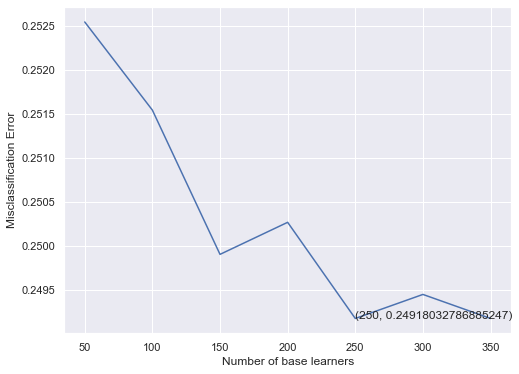

In [42]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

#### Training the best model and calculating accuracy on test data 

In [43]:
clf = RandomForestClassifier(n_estimators = optimal_learners,class_weight={0:1/0.63,1:1/0.21,2:1/0.16},random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative','neutral','positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

    negative       0.82      0.86      0.84      2294
     neutral       0.56      0.49      0.52       775
    positive       0.67      0.64      0.65       591

    accuracy                           0.75      3660
   macro avg       0.68      0.66      0.67      3660
weighted avg       0.74      0.75      0.74      3660

Accuracy of the model is :  0.7483606557377049


<AxesSubplot:>

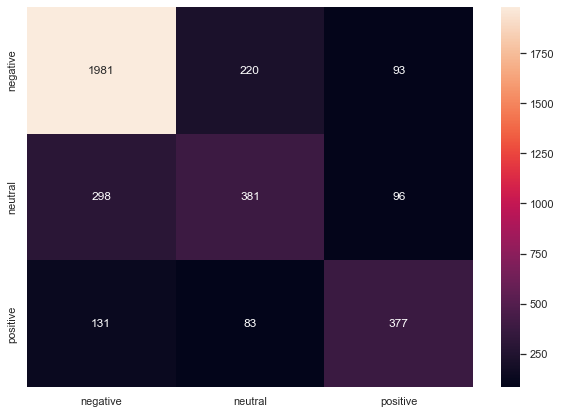

In [44]:
conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0','1','2']],
                  columns = [i for i in ['0','1','2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g',xticklabels=['negative','neutral','positive'],yticklabels=['negative','neutral','positive'])

* The built model shows the highest accuracy, precision, and recall for predicting negative tweets, and the lowest for predicting neutral tweets.
* Neutral tweets were observed to be predicted as negative tweets relatively frequently.
* Accuracy of the model is 0.7467.

### WordCloud of Top 40 features

thank,great,delay,flight,hours,love,awesome,hold,get,cancel,call,best,bag,service,please,would,amaze,worst,time,hour,customer,fly,wait,need,go,help,make,airline,appreciate,tell,good,still,hrs,plane,never,say,dm,phone,try,work,
 
 


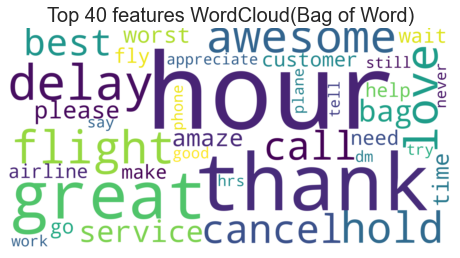

In [45]:
all_features = count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud(Bag of Word)', fontsize=20)
plt.axis("off")
plt.show()

* **hour, thank, great, delay, flight, cancel, best, awesome, love, hold, call** were some of the important repetition words in predicting sentiment based on Bag of Words.

### TF-IDF

#### Vectorization

In [46]:
tfidf_vect = TfidfVectorizer(max_features=1000)
data_features = tfidf_vect.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(14640, 1000)

In [47]:
X = data_features
y = data["airline_sentiment"].replace({"negative": 0, "neutral": 1,"positive":2})

#### Split data into training and testing set

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

#### optimizing the parameter(n_estimators) and K-fold cross-validation

In [50]:
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,class_weight={0:1/0.63,1:1/0.21,2:1/0.16},random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

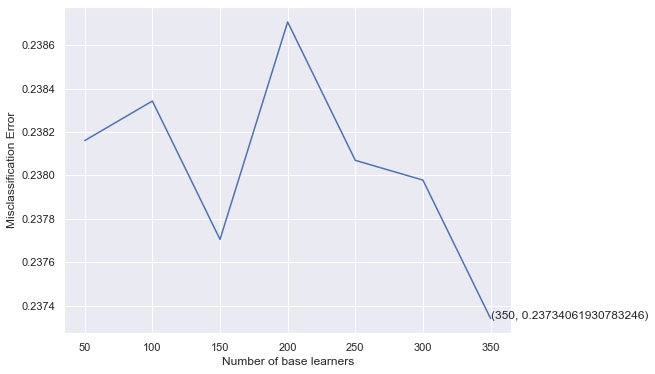

In [51]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

#### Training the best model and calculating accuracy on test data 

In [52]:
clf = RandomForestClassifier(n_estimators = optimal_learners,class_weight={0:1/0.63,1:1/0.21,2:1/0.16},random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['negative','neutral','positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

    negative       0.81      0.90      0.85      2294
     neutral       0.62      0.49      0.55       775
    positive       0.72      0.61      0.66       591

    accuracy                           0.77      3660
   macro avg       0.72      0.67      0.69      3660
weighted avg       0.76      0.77      0.76      3660

Accuracy of the model is :  0.7672131147540984


<AxesSubplot:>

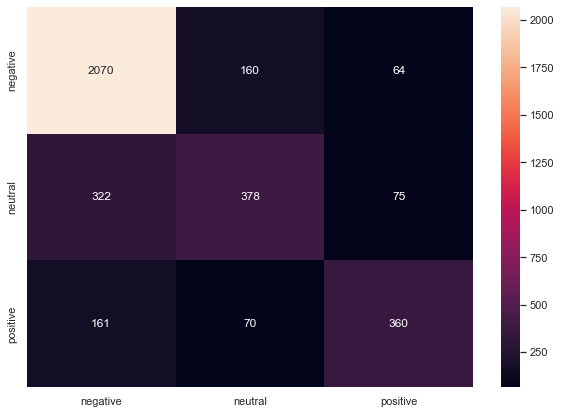

In [53]:
conf_mat = confusion_matrix(y_test, tf_idf_predicted)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0','1','2']],
                  columns = [i for i in ['0','1','2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g',xticklabels=['negative','neutral','positive'],yticklabels=['negative','neutral','positive'])

* The built model shows the highest accuracy, precision, and recall for predicting negative tweets, and the lowest for predicting neutral tweets.
* Neutral tweets were observed to be predicted as negative tweets relatively frequently.
* Accuracy of the model is 0.7467.

thank, great, flight, delay, love, hours, cancel, get, awesome, hold, call, best, bag, service, wait, time, please, customer, amaze, fly, airline, need, hour, make, would, good, worst, dm, appreciate, tell, still, say, go, help, plane, phone, never, hrs, like, much, 
 
 


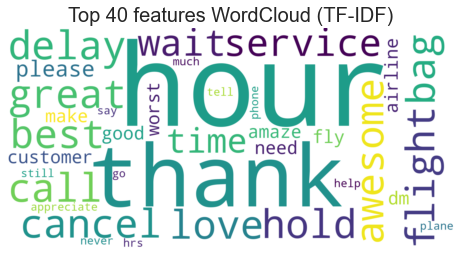

In [54]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud (TF-IDF)', fontsize=20)
plt.axis("off")
plt.show()

* **hour, thank, great, flight, delay, love, awesome, call, hold, bag, best** were some of the important repetition words in predicting sentiment based on TF-IDF.

## Comparing the accuracies of vectorizations

In [55]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(),columns =['sentiment'])
df['count_vectorizer_predicted'] = count_vectorizer_predicted
df['tf_idf_predicted'] = tf_idf_predicted
df = df.replace({0:"negative", 1:"neutral",2:"positive"})
df.sample(n=5,random_state=5)

,sentiment,count_vectorizer_predicted,tf_idf_predicted
1813,positive,positive,positive
1383,positive,neutral,positive
1419,negative,negative,negative
1006,negative,neutral,neutral
95,negative,negative,negative


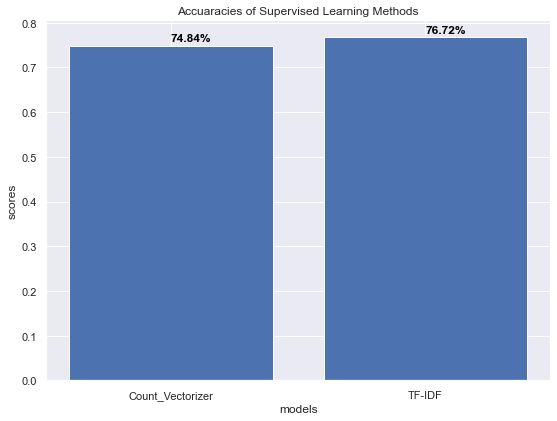

In [56]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

* It was observed that TF-IDF shows better performance than Count Vectorizer. (74.64% of accuracy vs 76.78% of accuracy)

## Summary


### Exploratory Data Analysis.(EDA)


- A significant number of the tweets are negative in sentiment (62.69%).


- Customer service issue was the most common reason for negative tweets.


- Word cloud plots were created based on positive and negative tweets about the airline.

### Text Preprocessing


- Text preprocessing is a data mining technique that transforms raw data into an understandable format suitable for natural language processing, and is an important first step in any NLP application.


- Lowercase letters, non-ASCII characters stripping, replacing contractions, numbers stripping, URL stripping, HTML tag stripping, '@' mention stripping, punctuation stripping, tokenization, stopword filtering, hashtag stripping, and lemmatization were used.


- Preprocessed data was converted to numbers (vectorized) so we could feed the data into the model.

### Model Building and Test Accuracy


- The goal was to build a text classification model based on sentiment.


- The random forest models were trained based on the number of optimized estimators.


- Vectorization using the TF-IDF method, which weights words based on importance in addition to simple frequency, improved overall accuracy over CounterVectorize method.


- After building the classification model, the results was predicted on the test data and the accuracy on the test set was 76.78% .


- 1000 features were used considering computing resources, but higher accuracy could be obtained if more features were used.


- Applying other model tuning and hyperparameter tuning techniques and other preprocessing techniques will further increase the overall accuracy.